# Анализ показателей 

**Описание:** Данные по заказам сети кофеен.

**Цель исследования:** Провести анализ выручки, количества чеков, среднего чека по точкам продаж.

**Описание данных:**
* **date** - дата заказа;
* **weekday** - день недели заказа;
* **time** - время заказа;
* **check_id** - номер заказа, присвоенный программой;
* **type_payment** - тип оплаты;
* **sno** - СНО;
* **point** - точка продаж;
* **position** - количество позиций в чеке;
* **revenue** - сумма чека;
* **name_position** - наименований позиций;
* **type-calculation** - способ расчета;
* **comment** - комментарий;
* **name_employee** - ФИ сотрудника.


**Ход исследования:**
1. Загрузка данных
2. Предобработка данных
3. Изучение данных
4. Анализ данных
5. Общий вывод и рекомендации

Приложение (презентация)

## Загрузка данных

In [1]:
# импорт библиотек
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# cчитывание данных файла и сохранение в переменную
try:
    all_check = pd.read_excel('файл.xlsx')
except FileNotFoundError:
    print("файлы не найдены")

In [3]:
# создадим функцию для получения общих характеристик

def all_info (data):
    print('ПЕРВЫЕ СТРОКИ')
    display(data.head(10))
    print('ОБЩАЯ ИНФОРМАЦИЯ')
    display(data.info())
    print('КОЛИЧЕСТВО ПРОПУЩЕННЫХ ЗНАЧЕНИЙ')
    display(data.isna().sum())
    print('НАЛИЧИЕ ДУБЛИКАТОВ')
    display(data.duplicated().sum())

In [4]:
all_info(all_check)

ПЕРВЫЕ СТРОКИ


,date,weekday,time,check_id,type_payment,sno,point,position,revenue,name_position,type_calculation,comment,name_employee
0,2024-02-01,чт,09:13:00,32419.0,нал.,Патент,КиК Ньютон,1.0,0.0,Молоко,NaN,Остатки,Елисеев Е.
1,2024-02-01,чт,09:13:00,32418.0,"нал., %",Патент,КиК Ньютон,2.0,0.0,Капля 0.4\nКапля 0.4,NaN,Срокгодности,Елисеев Е.
2,2024-02-01,чт,09:12:00,32417.0,"нал., %",Патент,КиК Ньютон,2.0,0.0,Флэт уайт 0.2\nКофе (основной),NaN,Настройкапомола,Елисеев Е.
3,2024-02-01,чт,09:11:00,32416.0,б/н,Патент,КиК Ньютон,1.0,170.0,Капля 0.3,NaN,NaN,Елисеев Е.
4,2024-02-01,чт,09:10:00,32415.0,б/н,Патент,КиК Ньютон,3.0,630.0,Раф 0.4\nРаф 0.4\nМакаруны,NaN,NaN,Елисеев Е.
5,2024-02-01,чт,09:07:00,32414.0,б/н,Патент,КиК Ньютон,1.0,230.0,Раф 0.4,NaN,NaN,Елисеев Е.
6,2024-02-01,чт,09:06:00,32413.0,б/н,Патент,КиК Ньютон,4.0,720.0,Сэндвич в асс.\nРолл сэндвич\nКапучино 0.2\nКа...,NaN,NaN,Елисеев Е.
7,2024-02-01,чт,09:05:00,32412.0,б/н,Патент,КиК Ньютон,4.0,580.0,Капучино 0.3\nСироп доп.\nСэндвич в асс.\nБато...,NaN,NaN,Елисеев Е.
8,2024-02-01,чт,08:56:00,32411.0,б/н,Патент,КиК Ньютон,2.0,580.0,со. Капучино 0.4\nАмерикано 0.4,NaN,NaN,Елисеев Е.
9,2024-02-01,чт,08:51:00,32410.0,б/н,Патент,КиК Ньютон,1.0,230.0,Американо 0.4,NaN,NaN,Елисеев Е.


ОБЩАЯ ИНФОРМАЦИЯ
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188023 entries, 0 to 188022
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              188023 non-null  datetime64[ns]
 1   weekday           188023 non-null  object        
 2   time              187677 non-null  object        
 3   check_id          187677 non-null  float64       
 4   type_payment      187677 non-null  object        
 5   sno               187677 non-null  object        
 6   point             187677 non-null  object        
 7   position          187677 non-null  float64       
 8   revenue           188010 non-null  float64       
 9   name_position     188010 non-null  object        
 10  type_calculation  342 non-null     object        
 11  comment           7490 non-null    object        
 12  name_employee     187677 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(9

None

КОЛИЧЕСТВО ПРОПУЩЕННЫХ ЗНАЧЕНИЙ


date                     0
weekday                  0
time                   346
check_id               346
type_payment           346
sno                    346
point                  346
position               346
revenue                 13
name_position           13
type_calculation    187681
comment             180533
name_employee          346
dtype: int64

НАЛИЧИЕ ДУБЛИКАТОВ


0

**Вывод:**

- привести к строчным буквам в данных, кроме столбца с точками продаж и сотрудниками;
- изменить тип данных;
- убрать из данных строки с пропусками по столбцу с '№ чека' по 'Позиций';
- проверить дубликаты по чекам

## Предобработка данных

**Редактирование данных**

In [5]:
# создадим список столбцов, где необходимо привести к нижнему регистру данные
columns = ['sno', 'name_position', 'type_calculation', 'comment']

# применяем функцию lower() ко всем столбцам
for column in columns:
    all_check[column] = all_check[column].str.lower()

**Удаление пустых строк**

In [6]:
# создадим список столбцов, где нет данных
columns_to_check = ['check_id', 'type_payment', 'sno', 'point', 'position']

# удалим строки, в которых пропуски присутствуют во всех указанных столбцах
all_check.dropna(subset=columns_to_check, how='all', inplace=True)

**Дубликаты**

In [7]:
# посмотрим повторяются ли номера у чеков
all_check['check_id'].duplicated().sum()

75647

In [8]:
# выведем для примера
all_check.query('check_id == 32415')

,date,weekday,time,check_id,type_payment,sno,point,position,revenue,name_position,type_calculation,comment,name_employee
4,2024-02-01,чт,09:10:00,32415.0,б/н,патент,КиК Ньютон,3.0,630.0,раф 0.4\nраф 0.4\nмакаруны,NaN,NaN,Елисеев Е.
158714,2024-10-16,ср,23:46:00,32415.0,б/н,патент,КиК Аллея,3.0,740.0,капучино 0.3\nлатте 0.3\nпп десерт,NaN,NaN,Аллея п.


_Это не дубликаты, а программа так ведет учет по разным точкам продаж могут повторяться номера._

**Изменение типа данных**

In [9]:
# изменение на int
all_check['check_id'] = all_check['check_id'].astype('int', errors='raise') 
all_check['position'] = all_check['position'].astype('int', errors='raise') 

# изменение на datetime
all_check['time'] = pd.to_datetime(all_check['time'], format='%H:%M:%S')

**Добавление новых столбцов**

In [10]:
# тк данные представлены по двум точкам продаж и некоторые номера совпадают, 
# добавим столбец с ID 
all_check.insert(0, 'id', range(len(all_check)))

# добавим столбец смесяцем
all_check['month'] = all_check['date'].dt.to_period('M')

# извлекаем часы и создаём новый столбец
all_check['time'] = all_check['time'].dt.round('1h')
all_check['hours'] = all_check['time'].dt.hour

**Результат предобрадотки данных**

In [11]:
display(all_check.head())
display(all_check.info())

,id,date,weekday,time,check_id,type_payment,sno,point,position,revenue,name_position,type_calculation,comment,name_employee,month,hours
0,0,2024-02-01,чт,1900-01-01 09:00:00,32419,нал.,патент,КиК Ньютон,1,0.0,молоко,NaN,остатки,Елисеев Е.,2024-02,9
1,1,2024-02-01,чт,1900-01-01 09:00:00,32418,"нал., %",патент,КиК Ньютон,2,0.0,капля 0.4\nкапля 0.4,NaN,срокгодности,Елисеев Е.,2024-02,9
2,2,2024-02-01,чт,1900-01-01 09:00:00,32417,"нал., %",патент,КиК Ньютон,2,0.0,флэт уайт 0.2\nкофе (основной),NaN,настройкапомола,Елисеев Е.,2024-02,9
3,3,2024-02-01,чт,1900-01-01 09:00:00,32416,б/н,патент,КиК Ньютон,1,170.0,капля 0.3,NaN,NaN,Елисеев Е.,2024-02,9
4,4,2024-02-01,чт,1900-01-01 09:00:00,32415,б/н,патент,КиК Ньютон,3,630.0,раф 0.4\nраф 0.4\nмакаруны,NaN,NaN,Елисеев Е.,2024-02,9


<class 'pandas.core.frame.DataFrame'>
Index: 187677 entries, 0 to 188022
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                187677 non-null  int64         
 1   date              187677 non-null  datetime64[ns]
 2   weekday           187677 non-null  object        
 3   time              187677 non-null  datetime64[ns]
 4   check_id          187677 non-null  int32         
 5   type_payment      187677 non-null  object        
 6   sno               187677 non-null  object        
 7   point             187677 non-null  object        
 8   position          187677 non-null  int32         
 9   revenue           187677 non-null  float64       
 10  name_position     187677 non-null  object        
 11  type_calculation  342 non-null     object        
 12  comment           7490 non-null    object        
 13  name_employee     187677 non-null  object        
 14  month    

None

**Вывод:** 

В ходе предобработки данных:
- отредактированы данные в столбцах;
- удалены пустые строки;
- добавлен новый столбец с ID, месяцем и временем оплаты;
- изменен тип данных.

## Изучение данных

In [12]:
# изучим данные после предобработки
print()
print('Данные за период с', all_check['date'].min().date(), 'по', all_check['date'].max().date())
print()
print('Выручка:', all_check['revenue'].sum(), 'руб.')
print()
print('Количество чеков:', all_check['check_id'].count())
print()
print('Количество позиций в чеке в среднем:', round(all_check['position'].mean()))
print('Количество позиций в чеке (медиана):', round(all_check['position'].median()))
print('Максимальное количество позиций в чеке:', all_check['position'].max())
print()
print('Средний чек:', round(all_check['revenue'].mean(), 2))
print('Средний чек (медиана):', round(all_check['revenue'].median(), 2))
print()


Данные за период с 2024-01-01 по 2024-11-30

Выручка: 62568610.1 руб.

Количество чеков: 187677

Количество позиций в чеке в среднем: 2
Количество позиций в чеке (медиана): 2
Максимальное количество позиций в чеке: 98

Средний чек: 333.38
Средний чек (медиана): 260.0



**Вывод:** 

Данные после обработки сходятся с итоговыми из выгрузки программы. Максимальное количество позиций в чеке слишком большое, необходимо посмотреть аномалии.

## Анализ данных

### Аномалии в данных

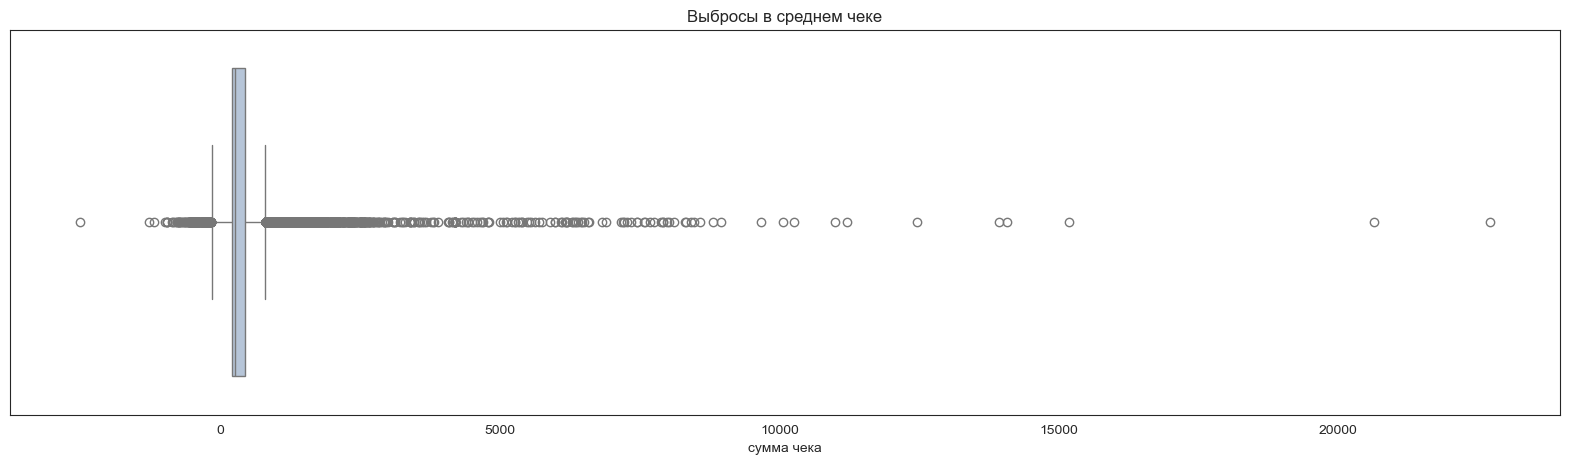

In [13]:
# зададим размер графика
plt.figure(figsize=(20, 5))

# стиль графика
sns.set_style('white') 

# строим график
sns.boxplot(data=all_check, x='revenue', color='lightsteelblue')

# установка заголовка графика
plt.title('Выбросы в среднем чеке')

# добавим подпись оси X
plt.xlabel('сумма чека')

# показ графика
plt.show()

In [14]:
# посмотрим на выбросы 
all_check.query('revenue < 1')

,id,date,weekday,time,check_id,type_payment,sno,point,position,revenue,name_position,type_calculation,comment,name_employee,month,hours
0,0,2024-02-01,чт,1900-01-01 09:00:00,32419,нал.,патент,КиК Ньютон,1,0.0,молоко,NaN,остатки,Елисеев Е.,2024-02,9
1,1,2024-02-01,чт,1900-01-01 09:00:00,32418,"нал., %",патент,КиК Ньютон,2,0.0,капля 0.4\nкапля 0.4,NaN,срокгодности,Елисеев Е.,2024-02,9
2,2,2024-02-01,чт,1900-01-01 09:00:00,32417,"нал., %",патент,КиК Ньютон,2,0.0,флэт уайт 0.2\nкофе (основной),NaN,настройкапомола,Елисеев Е.,2024-02,9
18,18,2024-02-01,чт,1900-01-01 08:00:00,42371,"нал., %",патент,КиК Аллея,2,0.0,"сэндвич в асс.\nгорячее ""просто""",NaN,витринасрокгодности,Аллея п.,2024-02,8
19,19,2024-02-01,чт,1900-01-01 08:00:00,42370,"нал., %",патент,КиК Аллея,1,0.0,пряник имбирный,NaN,нетоварныйвид,Аллея п.,2024-02,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187797,187451,2024-11-01,пт,1900-01-01 16:00:00,106782,"нал., %",патент,КиК Аллея,5,0.0,кофе (основной)\nмолоко\nсливки\nфлэт уайт 0.2...,NaN,настройпомола,Габдулханова З.,2024-11,16
187839,187493,2024-11-01,пт,1900-01-01 14:00:00,35936,нал.,патент,КиК Аллея,1,-120.0,"возврат:\nчай развесной 0,3",возврат,NaN,Ильина Н.,2024-11,14
187916,187570,2024-11-01,пт,1900-01-01 12:00:00,92550,"нал., %",патент,КиК Ньютон,1,0.0,морковный / love is торт,NaN,повинебариста,Юркина А.,2024-11,12
187951,187605,2024-11-01,пт,1900-01-01 11:00:00,106735,"нал., %",патент,КиК Аллея,3,0.0,"берн 0,5\nлатте 0.4\nсэндвич в асс. и на ржан...",NaN,дамир,Габдулханова З.,2024-11,11


_Данные отражают возвраты, списания по сроку годности и другие нужды._

In [15]:
# посмотрим на выбросы 
all_check.query('revenue > 5000')

,id,date,weekday,time,check_id,type_payment,sno,point,position,revenue,name_position,type_calculation,comment,name_employee,month,hours
20083,20036,2024-02-14,ср,1900-01-01 21:00:00,46410,б/н,патент,КиК Аллея,11,6205.0,бронь зала после 16:00 (цена за час)\nпитьевая...,NaN,NaN,Аллея Д.,2024-02,21
50829,50719,2024-04-14,вс,1900-01-01 20:00:00,64194,б/н,патент,КиК Аллея,38,6355.0,латте 0.4\nамерикано 0.2\nсироп доп.\nчай разв...,NaN,NaN,Аллея У.,2024-04,20
50851,50741,2024-04-14,вс,1900-01-01 20:00:00,64177,б/н,патент,КиК Аллея,22,6200.0,латте 0.3\nсироп доп.\nшмель холодный\nмокачин...,NaN,NaN,Аллея У.,2024-04,20
50869,50759,2024-04-14,вс,1900-01-01 19:00:00,64163,б/н,патент,КиК Аллея,29,7750.0,"раф 0.4\nпитьевая/минеральная вода 0,5\nкапучи...",NaN,NaN,Аллея У.,2024-04,19
50874,50764,2024-04-14,вс,1900-01-01 19:00:00,64159,б/н,патент,КиК Аллея,25,7460.0,раф 0.4\nкапучино 0.3\nкапучино 0.2\nфлэт уайт...,NaN,NaN,Аллея У.,2024-04,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110042,109821,2024-08-30,пт,1900-01-01 17:00:00,76076,нал.,патент,КиК Ньютон,23,5400.0,латте 0.4\nсо. капучино 0.2\nамерикано 0.2\nка...,NaN,NaN,Подмены Н.,2024-08,17
150417,150130,2024-10-29,вт,1900-01-01 16:00:00,91858,б/н,патент,КиК Ньютон,54,10995.0,раф 0.3\nкапучино 0.3\nсироп доп.\nоткрытка\nм...,NaN,NaN,Юркина А.,2024-10,16
150425,150138,2024-10-29,вт,1900-01-01 15:00:00,91849,б/н,патент,КиК Ньютон,56,13930.0,со. латте 0.3\nсо. латте 0.4\nраф 0.3\nice- ко...,NaN,NaN,Юркина А.,2024-10,15
157363,157065,2024-10-18,пт,1900-01-01 23:00:00,89184,б/н,патент,КиК Ньютон,25,6090.0,"какао 50/50 0,2\nсэндвич в асс.\nмаршмеллоу до...",NaN,NaN,Кондранина Т.,2024-10,23


_В основном большое количество позиций в чеке, говорит о том, что после сбоя программы, все вносилось одним чеком. По 99593 необходимо уточнить._

**ВОЗВРАТЫ**

In [16]:
# создадим отдельно таблицу с возвратами
returns = all_check.query('revenue < 0')

# изучим данные
print()
print('Количество возвратов:', returns['id'].count().sum())
print()
print('На сумму:', round(returns['revenue'].sum(), 2), 'руб.')
print()
print('Со средним чеком:', round(returns['revenue'].mean(), 2), 'руб.')


Количество возвратов: 333

На сумму: -104367.2 руб.

Со средним чеком: -313.42 руб.


In [17]:
# сгруппируем данные по сотрудникам, 
# отсортировав по количеству возвратов
returns.groupby('name_employee').agg({'id': 'count', 'revenue': 'sum'}).sort_values(by='id', ascending=False)

,id,revenue
name_employee,,
Аллея п.,43,-13001.0
Аллея Д.,40,-12520.0
Аллея У.,27,-9628.0
Заварухина Н.,27,-9506.0
Подмены Н.,23,-9546.0
ПУСТОЙ,21,-4949.2
Ильина Н.,18,-4180.0
Полешко В.,17,-5480.0
Асманова П.,14,-3253.0


**ВЫРУЧКА = 0**

In [18]:
# создадим отдельно таблицу с выручкой=0
revenue_0 = all_check.query('revenue == 0')
print()
print('Количество чеков с выручкой=0:', revenue_0['id'].count().sum())
print()


Количество чеков с выручкой=0: 7551



In [19]:
# сгруппируем данные по комментариям
revenue_0.groupby('comment').agg({'id': 'count'}).sort_values(by='id', ascending=False)

,id
comment,
расходник,1370
настройкапомола,1253
дамир,1156
остатки,997
срокгодности,831
переделал,491
витринасрокгодности,455
маркетинг,365
настройпомола,186


**ВЫРУЧКА > 5000**

Берем порог в 5000, так как именно свыше этой суммы вносились все заказы одним чеком в программу после сбоя.

In [20]:
# создадим отдельно таблицу с выручкой > 5000
revenue_5000 = all_check.query('revenue > 5000')

# изучим данные
print()
print('Количество чеков с выручкой выше 5000 руб.:', revenue_5000['id'].count().sum())
print()
print('На сумму:', round(revenue_5000['revenue'].sum(), 2), 'руб.')
print()
print('Со средним чеком:', round(revenue_5000['revenue'].mean(), 2), 'руб.')


Количество чеков с выручкой выше 5000 руб.: 72

На сумму: 559535.0 руб.

Со средним чеком: 7771.32 руб.


Исключим данные по возвратам, выручке=0 и выручке>5000 для дальнейшего анализа, тк эти данные могут повлиять на точность исследования.

In [21]:
# исключаем данные, где revenue меньше 0 или равен 0
cheque_filtered = all_check.loc[(~all_check['revenue'].lt(0)) & (all_check['revenue'] != 0), :]

# исключаем данные, где revenue больше 5000
final_result = cheque_filtered.loc[cheque_filtered['revenue'] <= 5000, :]

In [22]:
# изучим данные после удаления аномалий
print()
print('Количество чеков:', final_result['id'].count())
print()
print('Количество позиций в чеке в среднем:', round(final_result['position'].mean()))
print('Количество позиций в чеке (медиана):', round(final_result['position'].median()))
print('Максимальное количество позиций в чеке:', final_result['position'].max())
print()
print('Средний чек:', round(final_result['revenue'].mean(), 2))
print('Средний чек (медиана):', round(final_result['revenue'].median(), 2))
print()
print('Выручка:', final_result['revenue'].sum(), 'руб.')


Количество чеков: 179721

Количество позиций в чеке в среднем: 2
Количество позиций в чеке (медиана): 2
Максимальное количество позиций в чеке: 30

Средний чек: 345.61
Средний чек (медиана): 260.0

Выручка: 62113442.3 руб.


**Вывод:** Аномалии исключили из общих данных для анализа по чеку.

### Выручка

In [23]:
# сгруппируем данные по точкам продаж
rev = all_check.groupby('point').agg({'revenue': 'sum'}).reset_index().sort_values(by='revenue', ascending=False)
rev['share'] = rev['revenue'] / all_check['revenue'].sum() * 100
rev

,point,revenue,share
0,КиК Аллея,39634430.6,63.345551
1,КиК Ньютон,22934179.5,36.654449


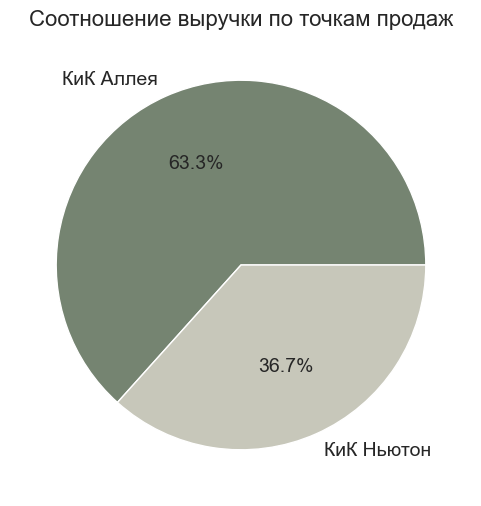

In [24]:
# задаем цвет графика
colors = ['#758471', '#C7C7BA']

# задаем список названий категорий
labels = ['КиК Аллея', 'КиК Ньютон']

# строим график
fig, ax = plt.subplots(figsize=(6, 6))
plt.pie(rev['revenue'], labels=labels, autopct='%1.1f%%', textprops={'fontsize': 14}, colors=colors)

# установка заголовка графика
plt.title('Соотношение выручки по точкам продаж', fontsize=16)

# показ графика
plt.show()

**динамика выручки по месяцам**

In [25]:
a = all_check.query('point == "КиК Аллея"').pivot_table(index='month', values='revenue', aggfunc='sum')
an = all_check.query('point == "КиК Ньютон"').pivot_table(index='month', values='revenue', aggfunc='sum')
an = an.merge(a, on='month', how='left') 

# переименуем названия столбцов
an = an.rename(columns={'revenue_x': 'КиК Ньютон', 'revenue_y': 'КиК Аллея'})
an

,КиК Ньютон,КиК Аллея
month,,
2024-01,1464376.0,2428594.0
2024-02,1537676.0,2574316.0
2024-03,1825888.0,2997980.0
2024-04,1977592.0,3125664.0
2024-05,2013058.0,3342347.2
2024-06,2171160.0,3661732.4
2024-07,2376680.0,3874784.0
2024-08,2620311.0,4307719.0
2024-09,2407433.0,4372656.0


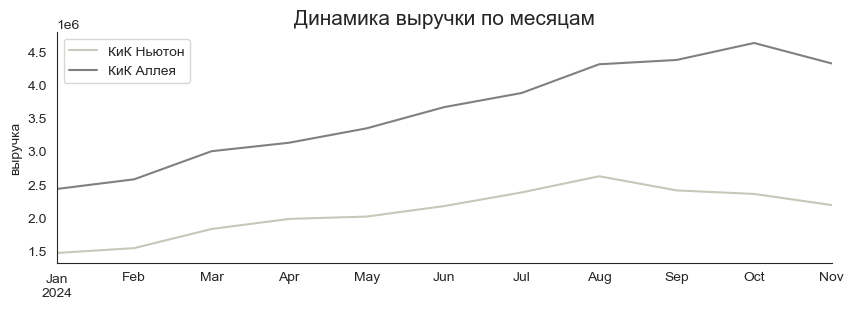

In [26]:
# на основании сводных данных строим график
(an.plot(grid=False, style='-', figsize=(10, 3), color=['#C7C7BA', 'grey']))

# установка заголовка графика
plt.title('Динамика выручки по месяцам', fontsize=15)

# подпись оси Х
plt.xlabel(None)

# добавим подпись оси Y
plt.ylabel('выручка')

# уберем рамку
for pos in ['right', 'top']: 
    plt.gca().spines[pos].set_visible(False)

# показ графика    
plt.show()

**динамика выручки по дням**

In [27]:
days_of_the_week = {
    'пн': 1,
    'вт': 2,
    'ср': 3,
    'чт': 4,
    'пт': 5,
    'сб': 6,
    'вс': 7
}

all_check['weekday'] = all_check['weekday'].map(lambda x: days_of_the_week[x])

data_week_a = all_check.query('point == "КиК Аллея"').groupby(['weekday'])['revenue'].agg('sum').reset_index()
data_week = all_check.query('point == "КиК Ньютон"').groupby(['weekday'])['revenue'].agg('sum').reset_index()
data_week = data_week.merge(data_week_a, on='weekday', how='left') 

# создадим словарь для замены номеров месяцев на их названия
day_name_map = {1: 'понедельник', 2: 'вторник', 3: 'среда', 4: 'четверг', 5: 'пятница', 6: 'суббота', 7: 'воскресенье'}

# заменим номера месяцев на их названия в столбце 'month'
data_week['weekday'] = data_week['weekday'].replace(day_name_map)

# переименуем названия столбцов
data_week = data_week.rename(columns={'revenue_x': 'КиК Ньютон', 'revenue_y': 'КиК Аллея'})

data_week

,weekday,КиК Ньютон,КиК Аллея
0,понедельник,3140742.0,5385568.8
1,вторник,3202002.0,5494113.0
2,среда,3187666.0,5689853.6
3,четверг,3240731.5,5706025.0
4,пятница,3305059.0,5976977.8
5,суббота,3702819.5,5965910.6
6,воскресенье,3155159.5,5415981.8


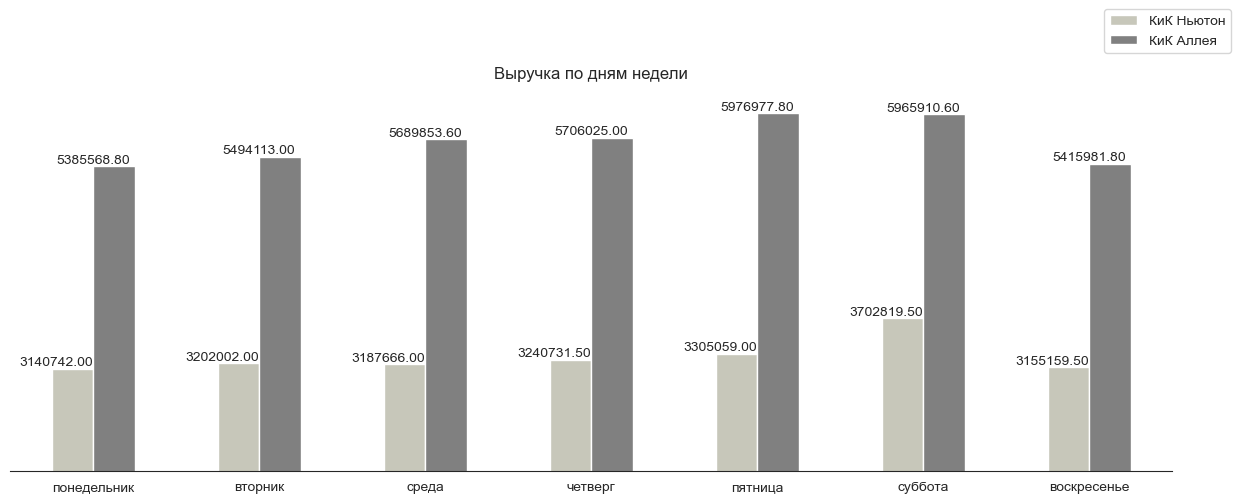

In [28]:
# стиль графика
sns.set_style('white') 

# строим график
# plt.bar(data_week['weekday'], data_week['revenue'], color='lightgrey')
ax = data_week.plot(x='weekday', y=['КиК Ньютон', 'КиК Аллея'], kind='bar', figsize=(15, 5), color=['#C7C7BA', 'grey'])   

# установка заголовка графика
plt.title('Выручка по дням недели', fontsize=12)

# уберем подпись оси 
plt.ylabel(None)
plt.xlabel(None)

# изменим диапазон оси Y
plt.ylim(2000000, None)

# уберём числовые значения по оси Y
plt.yticks([])

# изменим угол поворота подписей оси X
plt.xticks(rotation=0) 

# расположение легенды
plt.legend(loc="upper right", bbox_to_anchor=(1.05, 1.2), borderaxespad=0.001)

# добавляем значения к каждому столбцу
for i in range(len(data_week)):
    total_value = data_week['КиК Аллея'].iloc[i]
    ax.annotate(f'{total_value:.2f}', 
                xy=(i, total_value), 
                ha='center', 
                va='bottom')

    # Добавляем значения ко второму столбцу
    total_value_n = data_week['КиК Ньютон'].iloc[i]
    ax.annotate(f'{total_value_n:.2f}', 
                xy=(i, total_value_n), 
                ha='right', 
                va='bottom')

# уберем рамку
for pos in ['right', 'left', 'top']: 
    plt.gca().spines[pos].set_visible(False) 

# показ графика
plt.show()   

**динамика выручки по часам КиК Аллея**

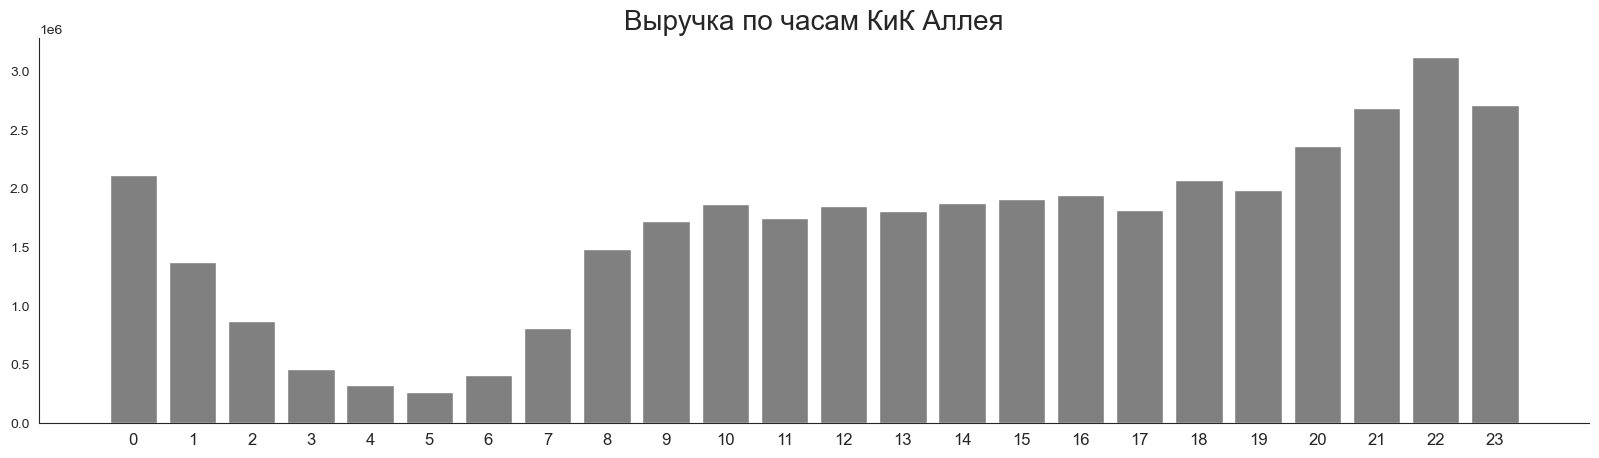

In [29]:
data_hour_a = all_check.query('point == "КиК Аллея"').groupby(['hours'])['revenue'].agg('sum').reset_index()

# зададим размер графика
plt.figure(figsize=(20, 5))

# стиль графика
sns.set_style('white') 

# строим график
plt.bar(data_hour_a['hours'], data_hour_a['revenue'], color='grey')
        
# установка заголовка графика
plt.title('Выручка по часам КиК Аллея', fontsize=20)

# уберем подпись оси Y
plt.ylabel(None)

# числовые значения по оси X
plt.xticks(np.arange(len(data_hour_a)), data_hour_a['hours'], fontsize=12)

# уберем рамку
for pos in ['right', 'top']: 
    plt.gca().spines[pos].set_visible(False) 

# показ графика
plt.show()   

**динамика выручки по часам КиК Ньютон**

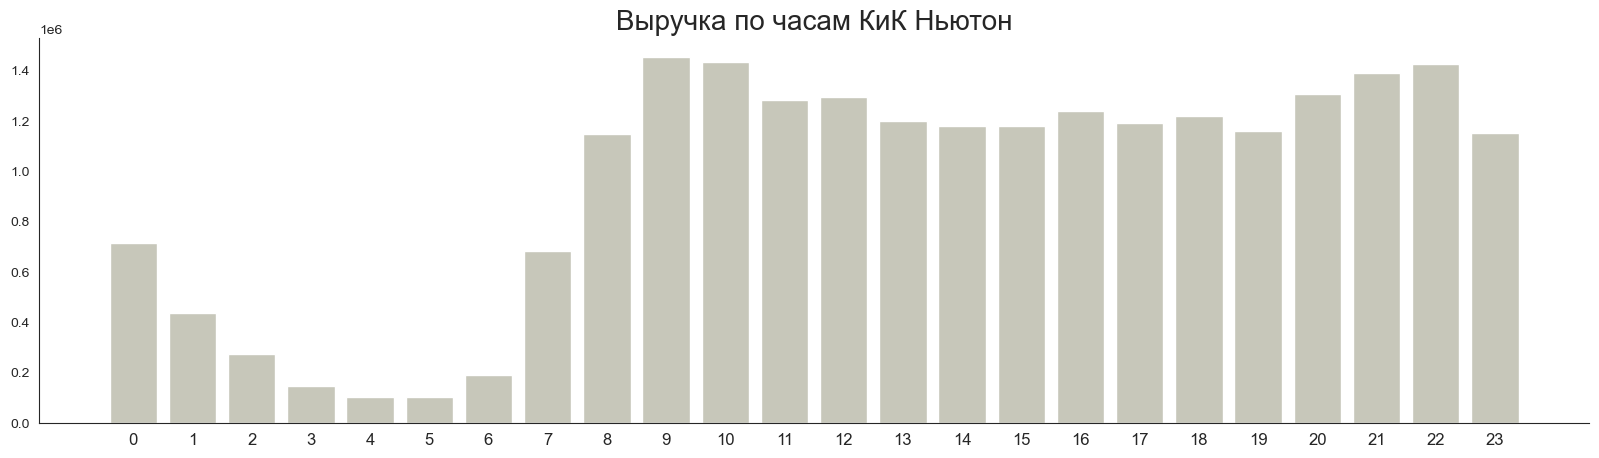

In [30]:
data_hour_n = all_check.query('point == "КиК Ньютон"').groupby(['hours'])['revenue'].agg('sum').reset_index()

# зададим размер графика
plt.figure(figsize=(20, 5))

# стиль графика
sns.set_style('white') 

# строим график
plt.bar(data_hour_n['hours'], data_hour_n['revenue'], color='#C7C7BA')
        
# установка заголовка графика
plt.title('Выручка по часам КиК Ньютон', fontsize=20)

# уберем подпись оси Y
plt.ylabel(None)

# числовые значения по оси X
plt.xticks(np.arange(len(data_hour_n)), data_hour_n['hours'], fontsize=12)

# уберем рамку
for pos in ['right', 'top']: 
    plt.gca().spines[pos].set_visible(False) 

# показ графика
plt.show()   

**Вывод:** 

Выручка за анализируемый период составила 39634430.6 (63%) по КиК Аллея и 22934179.5 (37%) по КиК Ньютон.

В динамике по месяцам наблюдается рост выручки по обеим точкам с небольшим снижением к концу года.

Максимальная выручка:
КиК Аллея - пт, сб и в период с 20 до 24 часов;
КиК Ньютон - сб и в период с 9 до 10 утром, с 21 до 22 вечером.

Минимальная выручка по обеим точкам наблюдается по пн и в период с 2 до 7.

### Количество чеков по очищенным данным

In [31]:
check = final_result.groupby('point').agg({'id': 'count'}).reset_index().sort_values(by='id', ascending=False)
check['share'] = check['id'] / final_result['id'].count() * 100
check

,point,id,share
0,КиК Аллея,113014,62.883024
1,КиК Ньютон,66707,37.116976


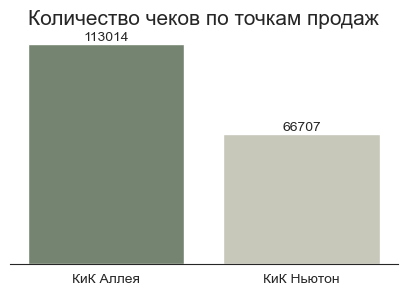

In [32]:
# зададим размер графика
plt.figure(figsize=(5, 3))

# стиль графика
sns.set_style('white') 

plt.bar(check['point'], check['id'], color=['#758471', '#C7C7BA'])
        
# установка заголовка графика
plt.title('Количество чеков по точкам продаж', fontsize=15)

# уберем подпись оси Y
plt.ylabel(None)

# уберём числовые значения по оси Y
plt.yticks([])

# добавим значения к каждому столбцу
for x, y in zip(check['point'], check['id']):
    plt.text(x, y, f'{y:.0f}', ha='center', va='bottom')

# уберем рамку
for pos in ['right', 'left', 'top']: 
    plt.gca().spines[pos].set_visible(False) 

# показ графика
plt.show()   

**количество чеков по месяцам**

In [33]:
check_a = final_result.query('point == "КиК Аллея"').pivot_table(index='month', values='id', aggfunc='count')
check_an = final_result.query('point == "КиК Ньютон"').pivot_table(index='month', values='id', aggfunc='count')
check_an = check_an.merge(check_a, on='month', how='left') 

# переименуем названия столбцов
check_an = check_an.rename(columns={'id_x': 'КиК Ньютон', 'id_y': 'КиК Аллея'})
check_an

,КиК Ньютон,КиК Аллея
month,,
2024-01,4295,7632
2024-02,4607,7999
2024-03,5575,9307
2024-04,5814,7559
2024-05,6091,9920
2024-06,6297,10151
2024-07,6764,10590
2024-08,7381,11922
2024-09,7004,12397


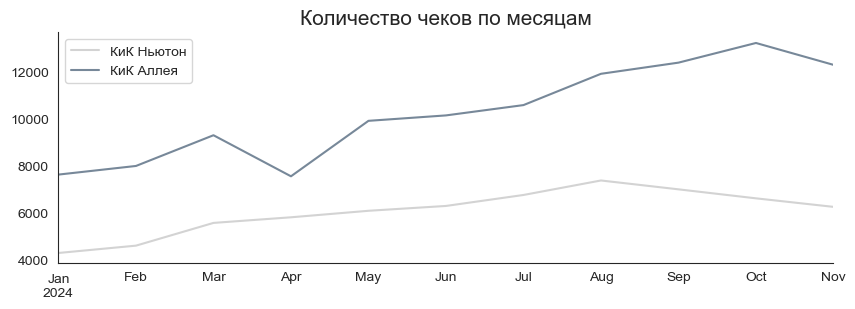

In [34]:
# на основании сводных данных строим график
(check_an.plot(grid=False, style='-', figsize=(10, 3), color=['lightgrey', 'lightslategrey']))

# установка заголовка графика
plt.title('Количество чеков по месяцам', fontsize=15)

# подпись оси Х
plt.xlabel(None)

# добавим подпись оси Y
plt.ylabel(None)

# уберем рамку
for pos in ['right', 'top']: 
    plt.gca().spines[pos].set_visible(False)

# показ графика    
plt.show()

**количество чеков по дням**

In [35]:
days = {
    'пн': 1,
    'вт': 2,
    'ср': 3,
    'чт': 4,
    'пт': 5,
    'сб': 6,
    'вс': 7
}

final_result.loc[:, 'weekday'] = final_result['weekday'].map(lambda x: days[x])

check_week_a = final_result.query('point == "КиК Аллея"').groupby(['weekday'])['id'].agg('count').reset_index()
check_week = final_result.query('point == "КиК Ньютон"').groupby(['weekday'])['id'].agg('count').reset_index()
check_week = check_week.merge(check_week_a, on='weekday', how='left') 

# создадим словарь для замены номеров месяцев на их названия
day_name = {1: 'понедельник', 2: 'вторник', 3: 'среда', 4: 'четверг', 5: 'пятница', 6: 'суббота', 7: 'воскресенье'}

# заменим номера месяцев на их названия в столбце 'month'
check_week['weekday'] = check_week['weekday'].replace(day_name)

# переименуем названия столбцов
check_week = check_week.rename(columns={'id_x': 'КиК Ньютон', 'id_y': 'КиК Аллея'})

check_week

,weekday,КиК Ньютон,КиК Аллея
0,понедельник,9314,15733
1,вторник,9451,16200
2,среда,9455,16592
3,четверг,9609,16549
4,пятница,9502,16672
5,суббота,10302,16238
6,воскресенье,9074,15030


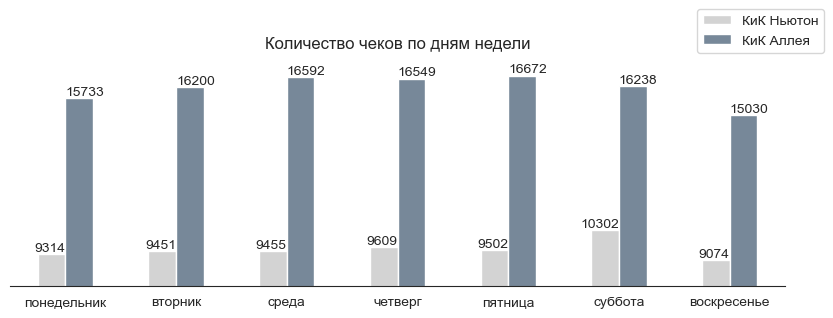

In [36]:
# стиль графика
sns.set_style('white') 

# строим график
ax = check_week.plot(x='weekday', y=['КиК Ньютон', 'КиК Аллея'], kind='bar', figsize=(10, 3), color=['lightgrey', 'lightslategrey'])   

# установка заголовка графика
plt.title('Количество чеков по дням недели', fontsize=12)

# уберем подпись оси
plt.ylabel(None)
plt.xlabel(None)

# изменим диапазон оси Y
plt.ylim(8000, None)

# уберём числовые значения по оси Y
plt.yticks([])

# изменим угол поворота подписей оси X
plt.xticks(rotation=0) 

# расположение легенды
plt.legend(loc="upper right", bbox_to_anchor=(1.05, 1.2), borderaxespad=0.001)

# добавляем значения к каждому столбцу
for i in range(len(check_week)):
    total_value = check_week['КиК Аллея'].iloc[i]
    ax.annotate(f'{total_value:.0f}', 
                xy=(i, total_value), 
                ha='left', 
                va='bottom')

    # Добавляем значения ко второму столбцу
    total_value_n = check_week['КиК Ньютон'].iloc[i]
    ax.annotate(f'{total_value_n:.0f}', 
                xy=(i, total_value_n), 
                ha='right', 
                va='bottom')

# уберем рамку
for pos in ['right', 'left', 'top']: 
    plt.gca().spines[pos].set_visible(False) 

# показ графика
plt.show()   

**количество чеков по часам**

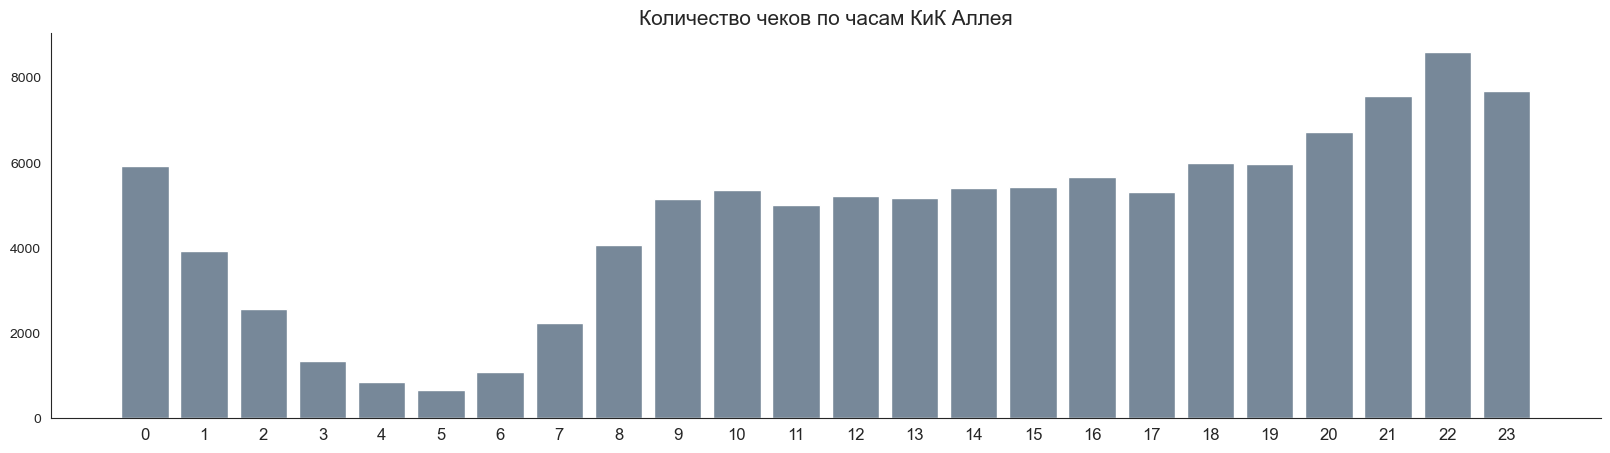

In [37]:
check_hour_a = final_result.query('point == "КиК Аллея"').groupby(['hours'])['id'].agg('count').reset_index()

# зададим размер графика
plt.figure(figsize=(20, 5))

# стиль графика
sns.set_style('white') 

# строим график
plt.bar(check_hour_a['hours'], check_hour_a['id'], color='lightslategrey')
        
# установка заголовка графика
plt.title('Количество чеков по часам КиК Аллея', fontsize=15)

# уберем подпись оси Y
plt.ylabel(None)

# числовые значения по оси X
plt.xticks(np.arange(len(check_hour_a)), check_hour_a['hours'], fontsize=12)

# уберем рамку
for pos in ['right', 'top']: 
    plt.gca().spines[pos].set_visible(False) 

# показ графика
plt.show()   

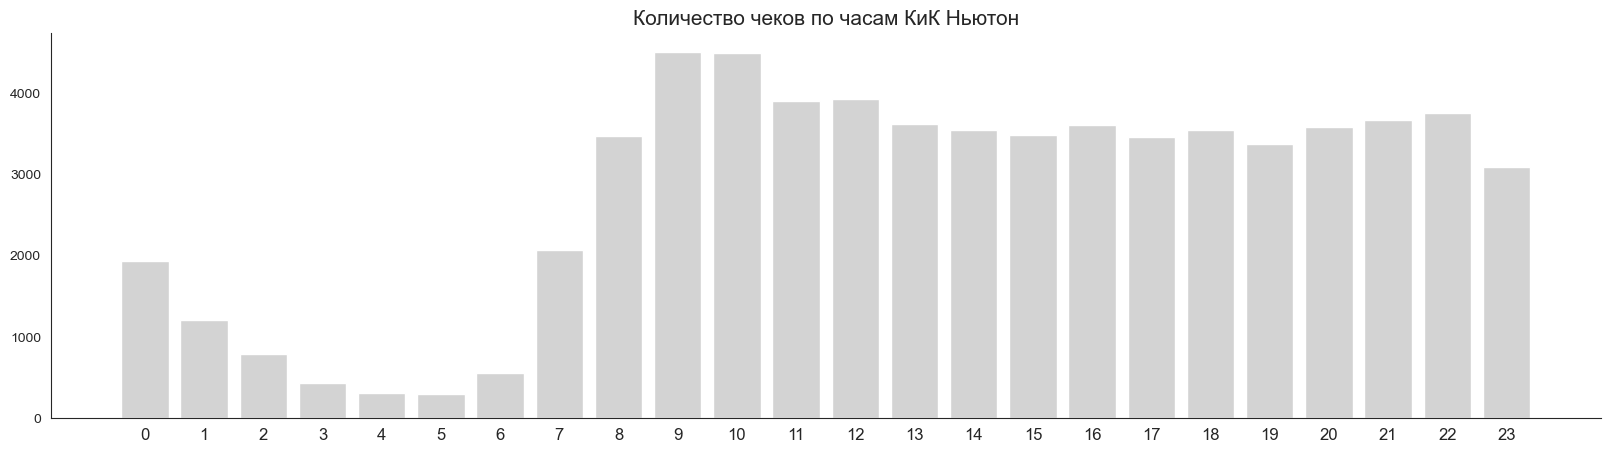

In [38]:
check_hour_n = final_result.query('point == "КиК Ньютон"').groupby(['hours'])['id'].agg('count').reset_index()

# зададим размер графика
plt.figure(figsize=(20, 5))

# стиль графика
sns.set_style('white') 

# строим график
plt.bar(check_hour_n['hours'], check_hour_n['id'], color='lightgrey')
        
# установка заголовка графика
plt.title('Количество чеков по часам КиК Ньютон', fontsize=15)

# уберем подпись оси Y
plt.ylabel(None)

# уберём числовые значения по оси Х
plt.xticks(np.arange(len(check_hour_n)), check_hour_n['hours'], fontsize=12)

# уберем рамку
for pos in ['right', 'top']: 
    plt.gca().spines[pos].set_visible(False) 

# показ графика
plt.show()   

**Вывод:** 

Количество чеков за анализируемый период составила 113014 (63%) по КиК Аллея и 66707 (37%) по КиК Ньютон. 

В динамике по месяцам наблюдается рост выручки по обеим точкам с небольшим снижением к концу года. Пик апреля вероятно связан сос боем программы, после которого много чеков вносили в один.

Максимальное количество чеков:
КиК Аллея - ср-пт и в период с 19 до 23 часов;
КиК Ньютон - сб и в период с 9 до 10 утром.

Минимальное количество чеков:
КиК Аллея - в вс и в период с 1 до 8;
КиК Ньютон - в вс и в период с 24 до 7.

### Средний чек по очищенным данным

**общий средний чек**

In [39]:
# вычисление медианы
median_value_a = final_result.query('point == "КиК Аллея"')['revenue'].median()
median_value_a

260.0

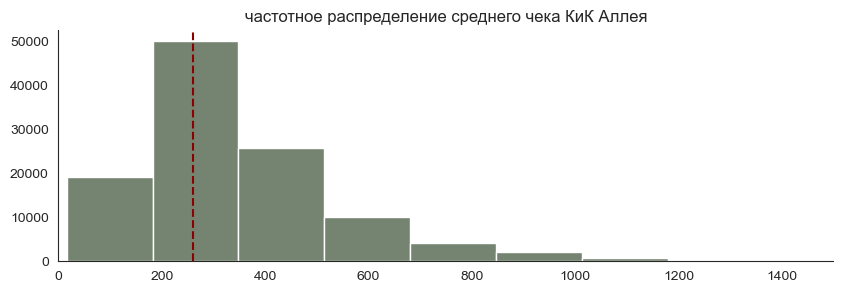

In [40]:
# зададим размер графика
plt.figure(figsize=(10, 3))

# строим график
final_result.query('point == "КиК Аллея"')['revenue'].hist(bins=30, color='#758471')

# установка заголовка графика
plt.title('частотное распределение среднего чека КиК Аллея', fontsize=12)

# уберем рамку
for pos in ['right', 'top']: 
    plt.gca().spines[pos].set_visible(False) 

# ограничиваем значения по оси Х
plt.xlim(0, 1500)

# Добавляем вертикальную линию для медианы
plt.axvline(x=median_value_a, color='darkred', linestyle='--')

# убираем сетку
plt.grid(False)

# показ графика
plt.show()   

In [41]:
# вычисление медианы
median_value_n = final_result.query('point == "КиК Ньютон"')['revenue'].median()
median_value_n

260.0

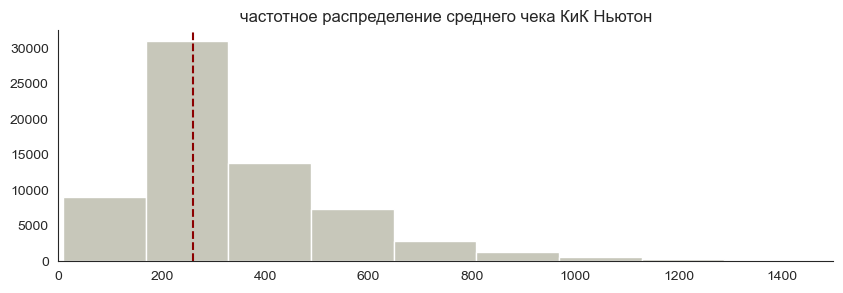

In [42]:
# зададим размер графика
plt.figure(figsize=(10, 3))

# строим график
final_result.query('point == "КиК Ньютон"')['revenue'].hist(bins=30, color='#C7C7BA')

# установка заголовка графика
plt.title('частотное распределение среднего чека КиК Ньютон', fontsize=12)

# уберем рамку
for pos in ['right', 'top']: 
    plt.gca().spines[pos].set_visible(False) 

# ограничиваем значения по оси Х
plt.xlim(0, 1500)

# Добавляем вертикальную линию для медианы
plt.axvline(x=median_value_n, color='darkred', linestyle='--')

# убираем сетку
plt.grid(False)

# показ графика
plt.show()   

In [43]:
avg_check = final_result.groupby('point').agg({'revenue': 'mean'}).reset_index().sort_values(by='revenue', ascending=False)
avg_check['revenue'] = round(avg_check['revenue'], 2)
avg_check

,point,revenue
0,КиК Аллея,347.13
1,КиК Ньютон,343.03


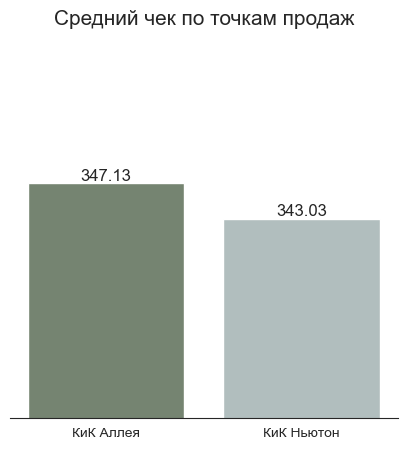

In [44]:
# зададим размер графика
plt.figure(figsize=(5, 5))

# стиль графика
sns.set_style('white') 

plt.bar(avg_check['point'], avg_check['revenue'], color=['#758471', '#b1bebe'])
        
# установка заголовка графика
plt.title('Средний чек по точкам продаж', fontsize=15)

# уберем подпись оси Y
plt.ylabel(None)

# изменим диапазон оси Y
plt.ylim(320, None)

# уберём числовые значения по оси Y
plt.yticks([])

# добавим значения к каждому столбцу
for x, y in zip(avg_check['point'], avg_check['revenue']):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=12)

# уберем рамку
for pos in ['right', 'left', 'top']: 
    plt.gca().spines[pos].set_visible(False) 

# показ графика
plt.show()   

**динамика среднего чека по месяцам**

In [45]:
ch_a = final_result.query('point == "КиК Аллея"').pivot_table(index='month', values='revenue', aggfunc='mean')
ch_an = final_result.query('point == "КиК Ньютон"').pivot_table(index='month', values='revenue', aggfunc='mean')
ch_an = ch_an.merge(ch_a, on='month', how='left') 

# переименуем названия столбцов
ch_an = ch_an.rename(columns={'revenue_x': 'КиК Ньютон', 'revenue_y': 'КиК Аллея'})
ch_an

,КиК Ньютон,КиК Аллея
month,,
2024-01,341.121304,318.826782
2024-02,333.812893,321.640455
2024-03,327.741345,323.063178
2024-04,340.297902,352.400053
2024-05,330.874733,337.290544
2024-06,344.792758,360.907654
2024-07,349.681549,366.545231
2024-08,351.898252,362.089750
2024-09,344.577813,353.256110


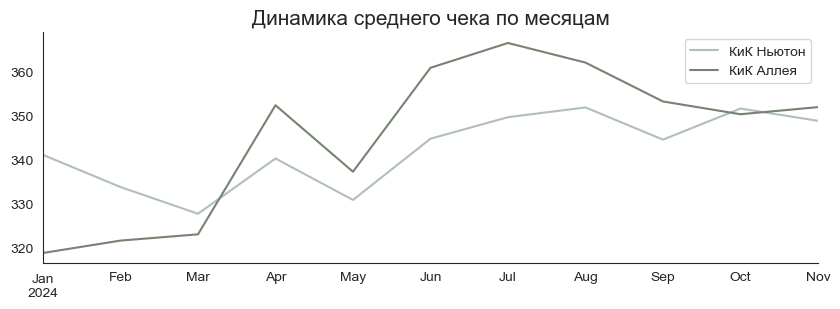

In [46]:
# на основании сводных данных строим график
(ch_an.plot(grid=False, style='-', figsize=(10, 3), color=['#b1bebe', '#758471']))

# установка заголовка графика
plt.title('Динамика среднего чека по месяцам', fontsize=15)

# подпись оси Х
plt.xlabel(None)

# добавим подпись оси Y
plt.ylabel(None)

# уберем рамку
for pos in ['right', 'top']: 
    plt.gca().spines[pos].set_visible(False)

# показ графика    
plt.show()

**динамика среднего чека по дням**

In [47]:
ch_week_a = final_result.query('point == "КиК Аллея"').groupby(['weekday'])['revenue'].agg('mean').reset_index()
ch_week = final_result.query('point == "КиК Ньютон"').groupby(['weekday'])['revenue'].agg('mean').reset_index()
ch_week = ch_week.merge(ch_week_a, on='weekday', how='left') 

# заменим номера месяцев на их названия в столбце 'month'
ch_week['weekday'] = ch_week['weekday'].replace(day_name)

# переименуем названия столбцов
ch_week = ch_week.rename(columns={'revenue_x': 'КиК Ньютон', 'revenue_y': 'КиК Аллея'})

ch_week

,weekday,КиК Ньютон,КиК Аллея
0,понедельник,336.499034,342.763237
1,вторник,336.466723,339.967716
2,среда,337.295188,343.312355
3,четверг,337.462951,345.637380
4,пятница,344.262155,352.146101
5,суббота,359.786983,356.597401
6,воскресенье,348.137481,349.505043


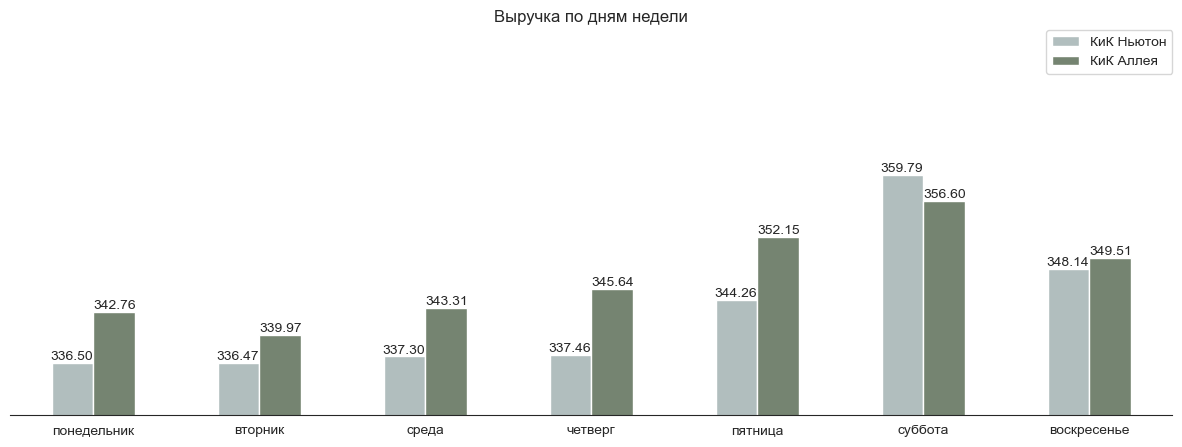

In [48]:
# стиль графика
sns.set_style('white') 

# строим график
ax = ch_week.plot(x='weekday', y=['КиК Ньютон', 'КиК Аллея'], kind='bar', figsize=(15, 5), color=['#b1bebe', '#758471'])   

# установка заголовка графика
plt.title('Выручка по дням недели', fontsize=12)

# уберем подпись оси 
plt.ylabel(None)
plt.xlabel(None)

# изменим диапазон оси Y
plt.ylim(330, None)

# уберём числовые значения по оси Y
plt.yticks([])

# изменим угол поворота подписей оси X
plt.xticks(rotation=0) 

# расположение легенды
plt.legend(loc="upper right", bbox_to_anchor=(1.0, 1.0), borderaxespad=0.001)

# добавляем значения к каждому столбцу
for i in range(len(ch_week)):
    total_value = ch_week['КиК Аллея'].iloc[i]
    ax.annotate(f'{total_value:.2f}', 
                xy=(i, total_value), 
                ha='left', 
                va='bottom')

    # Добавляем значения ко второму столбцу
    total_value_n = ch_week['КиК Ньютон'].iloc[i]
    ax.annotate(f'{total_value_n:.2f}', 
                xy=(i, total_value_n), 
                ha='right', 
                va='bottom')

# уберем рамку
for pos in ['right', 'left', 'top']: 
    plt.gca().spines[pos].set_visible(False) 

# показ графика
plt.show()   

**динамика среднего чека по часам**

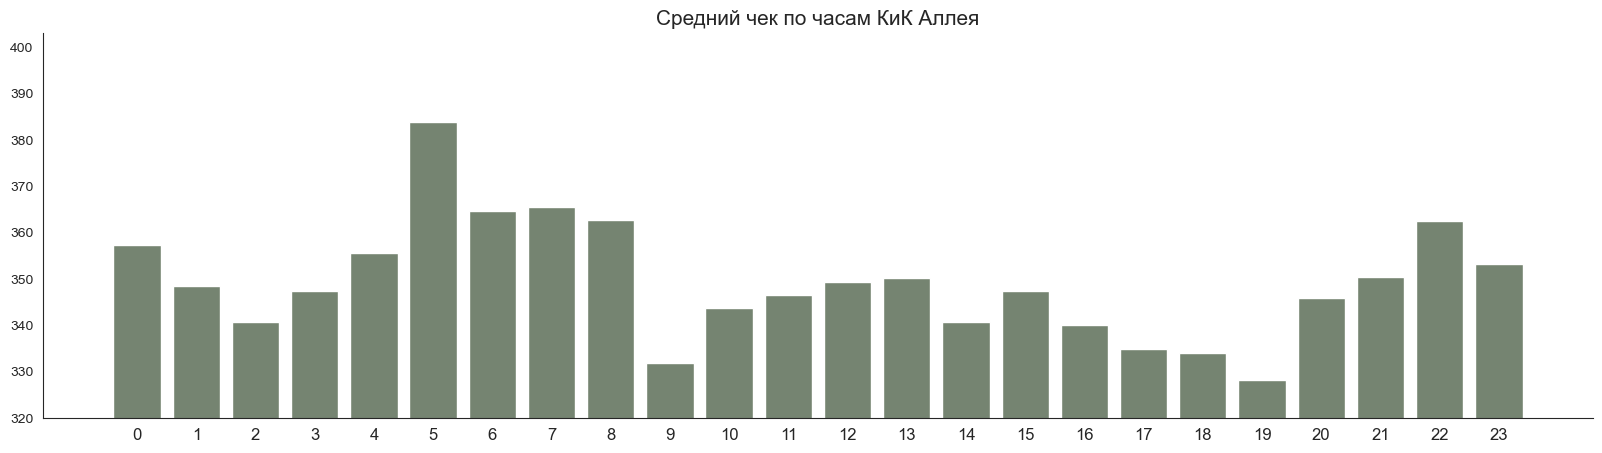

In [49]:
ch_hour_a = final_result.query('point == "КиК Аллея"').groupby(['hours'])['revenue'].agg('mean').reset_index()

# зададим размер графика
plt.figure(figsize=(20, 5))

# стиль графика
sns.set_style('white') 

# строим график
plt.bar(ch_hour_a['hours'], ch_hour_a['revenue'], color='#758471')
        
# установка заголовка графика
plt.title('Средний чек по часам КиК Аллея', fontsize=15)

# уберем подпись оси Y
plt.ylabel(None)

# изменим диапазон оси Y
plt.ylim(320, None)

# числовые значения
plt.xticks(np.arange(len(ch_hour_a)), ch_hour_a['hours'], fontsize=12)

# уберем рамку
for pos in ['right', 'top']: 
    plt.gca().spines[pos].set_visible(False) 

# показ графика
plt.show()   

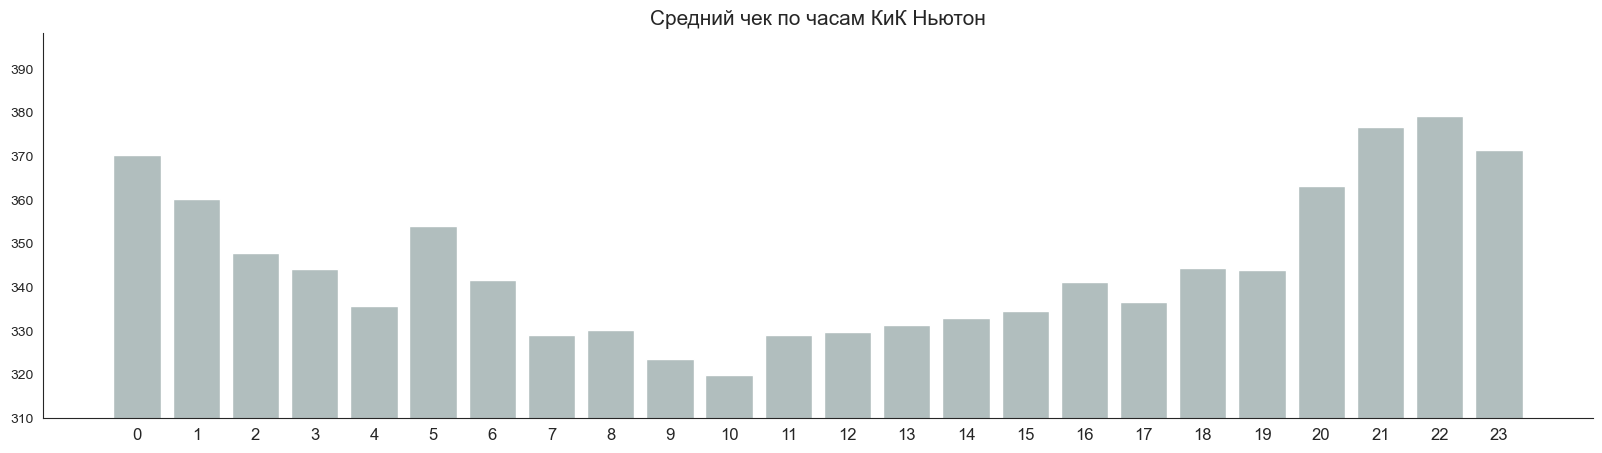

In [50]:
ch_hour_n = final_result.query('point == "КиК Ньютон"').groupby(['hours'])['revenue'].agg('mean').reset_index()

# зададим размер графика
plt.figure(figsize=(20, 5))

# стиль графика
sns.set_style('white') 

# строим график
plt.bar(ch_hour_n['hours'], ch_hour_n['revenue'], color='#b1bebe')
        
# установка заголовка графика
plt.title('Средний чек по часам КиК Ньютон', fontsize=15)

# уберем подпись оси Y
plt.ylabel(None)

# изменим диапазон оси Y
plt.ylim(310, None)

# числовые значения
plt.xticks(np.arange(len(ch_hour_n)), ch_hour_n['hours'], fontsize=12)

# уберем рамку
for pos in ['right', 'top']: 
    plt.gca().spines[pos].set_visible(False) 

# показ графика
plt.show()   

**Вывод:** 

Средний чек:
КиК Аллея - 347,13
КиК Ньютон - 343,03
Медианный одинаковый по обеим точкам - 260,00 руб.

В динамике по месяцам наблюдается увеличение среднего чека весной, в летние месяца самый высокий.

Максимальный средний чек в субботу, минимальный - вторник.

Периоды по часам:
КиК Аллея - с 5 до 8 и в 22 вечера (> 360 руб.), в 9 утра и с 17 до 19 (< 340 руб.)
КиК Ньютон - с 5 до 8 (> 360 руб.), с 9 до 10 (< 330 руб.)

## Общий вывод и рекомендации

В ходе предобработки данных:
- отредактированы данные в столбцах;
- удалены пустые строки;
- добавлен новый столбец с ID, месяцем и временем оплаты;
- изменен тип данных.

За 11 меясцев 2024 года оборот компании составил 62,5 млн.руб. Количество чеков составило 187677.

Средний чек: 333.38
Средний чек (медиана): 260.0

Большую долю выручки занимает КиК Аллея – 63%. Это может указывать на то, что данная точка более популярна среди клиентов.

Наблюдается рост выручки, как и рост количества чеков по обеим точкам, с небольшим снижением к концу года, вероятно, связанным с сезонностью.

Средний чек по КиК Ньютон при меньшем количестве чеков в субботу выше, чем по КиК Аллея. Несмотря на различие среднего чека по точкам продаж, медианный одинаковый – 260 руб.

В определённые часы средний чек превышает 360 рублей для КиК Аллея и КиК Ньютон. Это может свидетельствовать о том, что в эти периоды клиенты тратят больше денег, возможно, из-за специальных предложений или акций.

**рекомендации**

Разработать мероприятия, направленные на увеличение среднего чека. 


Провести дополнительный анализ по высокому среднему чеку в 5 часов утра, для выявления причин
.

В случае сбоев в работе программы не следует объединять все заказы в один или несколько чеко.


**ссылка на презентацию:** https://clck.ru/3FzLhg